<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/compare_with_tks_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare ATDCodeAnalyzer with TKS2023

![](https://raw.githubusercontent.com/armandossrecife/piloto/main/notebooks/compare_with_tks_2023.png "")

# 1. Install Dependencies

* [GitPython](https://gitpython.readthedocs.io/en/stable) - to clone git repositories
* [CLOC](https://github.com/AlDanial/cloc) - to calculate CLOC and other source code metrics





In [ ]:
!pip3 install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
!sudo apt install cloc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libalgorithm-diff-perl libalgorithm-diff-xs-perl libb-hooks-endofscope-perl
  libb-hooks-op-check-perl libclass-method-modifiers-perl
  libclass-xsaccessor-perl libdevel-callchecker-perl
  libdynaloader-functions-perl libimport-into-perl
  libmodule-implementation-perl libmodule-runtime-perl libmoo-perl
  libnamespace-clean-perl libpackage-stash-perl libpackage-stash-xs-perl
  libparallel-forkmanager-perl libparams-classify-perl libregexp-common-perl
  librole-tiny-perl libsub-exporter-progressive-perl libsub-identify-perl
  libsub-name-perl libsub-quote-perl libtry-tiny-perl libvariable-magic-perl
Suggested packages:
  libscalar-number-perl
The following NEW packages will be installed:
  cloc libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libb-hooks-endofscope-perl libb-hooks-op-check-perl
  libclass-method-modifiers-perl libclass-

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Dataset of Tsoukalas2023

A practical approach for technical debt prioritization based on class-level forecasting - https://sites.google.com/view/granular-td-forecasting

replication kit - https://sites.google.com/view/granular-td-forecasting/dataset

Apache Kafka replication kit - https://drive.google.com/file/d/1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb/view?usp=sharing

## 2.1 Replication Kit data and scripts

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb" -O apache_kafka_class_sonar_ck_measures_all_merged.csv && rm -rf /tmp/cookies.txt

--2023-08-30 14:24:33--  https://docs.google.com/uc?export=download&confirm=&id=1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.138, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cvom5r6u946mlbta0jp4ijrtuessfqag/1693405425000/05275383270790963625/*/1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb?e=download&uuid=8bddb073-08e4-4f63-aa60-cfa3fe701686 [following]
--2023-08-30 14:24:34--  https://doc-0s-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cvom5r6u946mlbta0jp4ijrtuessfqag/1693405425000/05275383270790963625/*/1xNkMETiPBvXzJmTPD5SrJLJQn0kSsmjb?e=download&uuid=8bddb073-08e4-4f63-aa60-cfa3fe701686
Resolving doc-0s-bg-docs.googleusercontent.com (doc-0s-bg-docs.googleusercontent.com)... 142.251.2.132, 2607:f

In [6]:
import pandas as pd

df_kafka_tks2023 =  pd.read_csv('apache_kafka_class_sonar_ck_measures_all_merged.csv', sep=';')
df_kafka_tks2023

,class_id,project_name,project_version,class_name,class_path,reliability_remediation_effort,reliability_rating,bugs,security_remediation_effort,security_rating,...,public_documented_api_density,Ca,Ce,WMC,NOC,DIT,LCOM,CBO,NPM,RFC
0,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,9d8dd9f104aef3a9db9005d85bc55a15f851d258,AbstractConfig.java,src/main/java/org/apache/kafka/common/config/A...,0,1.0,0,0,1.0,...,100,26,10,43,8,3,121,10,21,48
1,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,83fb734603376d1c9ef1d88bcb5f160da5522e45,AbstractConfig.java,src/main/java/org/apache/kafka/common/config/A...,0,1.0,0,0,1.0,...,100,27,11,46,8,3,122,11,22,48
2,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,356544caba6448c6ba3bcdb38bea787e1fbc277b,AbstractConfig.java,src/main/java/org/apache/kafka/common/config/A...,0,1.0,0,0,1.0,...,100,27,12,45,8,3,144,12,22,48
3,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,84c8d2bb86dc2794a3d6a86ae28b3cb51cea5c4b,AbstractConfig.java,src/main/java/org/apache/kafka/common/config/A...,0,1.0,0,0,1.0,...,100,28,12,45,8,3,144,12,22,48
4,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,75c7abd82628b7aae026a662ad0395d1f9c8536b,AbstractConfig.java,src/main/java/org/apache/kafka/common/config/A...,0,1.0,0,0,1.0,...,100,28,12,45,8,3,144,12,22,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85768,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,a3dc10f1d9bc90b13f7449902bf5af43de166de0,WriteTxnMarkersResponse.java,src/main/java/org/apache/kafka/common/requests...,0,1.0,0,0,1.0,...,100,5,10,15,0,3,0,10,6,33
85769,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,b282b2ab1073a04d33009865b4e9c600899bc2a0,WriteTxnMarkersResponse.java,src/main/java/org/apache/kafka/common/requests...,0,1.0,0,0,1.0,...,100,5,10,15,0,3,0,10,6,33
85770,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,93a60ee266a202c0b1e94010ce72ba7eb8d068a5,WriteTxnMarkersResponse.java,src/main/java/org/apache/kafka/common/requests...,0,1.0,0,0,1.0,...,100,5,10,15,0,3,0,10,6,33
85771,apache:kafka:src/main/java/org/apache/kafka/co...,apache:kafka3,7299e18369999ba2ff9485c1256410c569e35379,WriteTxnMarkersResponse.java,src/main/java/org/apache/kafka/common/requests...,0,1.0,0,0,1.0,...,100,5,10,15,0,3,0,10,6,33


In [8]:
df_kafka_tks2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85773 entries, 0 to 85772
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   class_id                                  85773 non-null  object 
 1   project_name                              85773 non-null  object 
 2   project_version                           85773 non-null  object 
 3   class_name                                85773 non-null  object 
 4   class_path                                85773 non-null  object 
 5   reliability_remediation_effort            85773 non-null  int64  
 6   reliability_rating                        85767 non-null  float64
 7   bugs                                      85773 non-null  int64  
 8   security_remediation_effort               85773 non-null  int64  
 9   security_rating                           85772 non-null  float64
 10  vulnerabilities                   

In [10]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OYXa5WsYSlg2NPybBm5_ScsmuYlyDa4v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OYXa5WsYSlg2NPybBm5_ScsmuYlyDa4v" -O apache_kafka_class_sonar_ck_measures_all_merged_filtered_2.xlsx && rm -rf /tmp/cookies.txt

--2023-08-30 14:32:40--  https://docs.google.com/uc?export=download&confirm=&id=1OYXa5WsYSlg2NPybBm5_ScsmuYlyDa4v
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lc7jbu3781u1qmbe5rmjbvfpc47un2sg/1693405950000/05275383270790963625/*/1OYXa5WsYSlg2NPybBm5_ScsmuYlyDa4v?e=download&uuid=182cb757-4d45-4553-9f4b-01f736164587 [following]
--2023-08-30 14:32:41--  https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lc7jbu3781u1qmbe5rmjbvfpc47un2sg/1693405950000/05275383270790963625/*/1OYXa5WsYSlg2NPybBm5_ScsmuYlyDa4v?e=download&uuid=182cb757-4d45-4553-9f4b-01f736164587
Resolving doc-10-bg-docs.googleusercontent.com (doc-10-bg-docs.googleusercontent.com)... 142.251.2.132, 2607:f

In [11]:
df_kafka_tks2023_by_priority = pd.read_excel('apache_kafka_class_sonar_ck_measures_all_merged_filtered_2.xlsx')
df_kafka_tks2023_by_priority

,Class ID,Class Name,Versions,TD of Last Version,Number of changes,Change Proneness (CP),Number of TD changes,TD Change Proneness (CP-TD),Expected Size Change (ED-LOC),Expected TD Change (ED-TD),Jira Issues
0,apache:kafka:src/main/java/org/apache/kafka/st...,StreamThread.java,150,358,80,0.533333,59,0.393333,3.140940,-0.597315,106
1,apache:kafka:src/main/java/org/apache/kafka/cl...,Fetcher.java,150,335,60,0.400000,36,0.240000,4.147651,1.167785,49
2,apache:kafka:src/main/java/org/apache/kafka/st...,StreamTask.java,150,80,58,0.386667,18,0.120000,2.161074,0.100671,71
3,apache:kafka:src/main/java/org/apache/kafka/cl...,KafkaConsumer.java,150,141,53,0.353333,13,0.086667,1.798658,0.697987,152
4,apache:kafka:src/main/java/org/apache/kafka/st...,StreamsConfig.java,138,141,47,0.340580,14,0.101449,3.452555,0.700730,20
...,...,...,...,...,...,...,...,...,...,...,...
366,apache:kafka:src/main/java/org/apache/kafka/co...,RecordTooLargeException.java,150,315,1,0.006667,1,0.006667,0.000000,0.000000,1
367,apache:kafka:src/main/java/org/apache/kafka/co...,SchemaException.java,150,0,1,0.006667,1,0.006667,0.000000,0.000000,0
368,apache:kafka:src/main/java/org/apache/kafka/co...,SerializationException.java,150,20,1,0.006667,1,0.006667,0.000000,0.000000,0
369,apache:kafka:src/main/java/org/apache/kafka/co...,SynchronizedCache.java,150,0,1,0.006667,1,0.006667,0.000000,0.000000,0


In [12]:
df_kafka_tks2023_by_priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Class ID                       371 non-null    object 
 1   Class Name                     371 non-null    object 
 2   Versions                       371 non-null    int64  
 3   TD of Last Version             371 non-null    int64  
 4   Number of changes              371 non-null    int64  
 5   Change Proneness (CP)          371 non-null    float64
 6   Number of TD changes           371 non-null    int64  
 7   TD Change Proneness (CP-TD)    371 non-null    float64
 8   Expected Size Change (ED-LOC)  371 non-null    float64
 9   Expected TD Change (ED-TD)     371 non-null    float64
 10  Jira Issues                    371 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 32.0+ KB


Top 18 class by priority (TKS2023)

In [13]:
df_kafka_tks2023_by_priority['Class Name'].head(18)

0              StreamThread.java
1                   Fetcher.java
2                StreamTask.java
3             KafkaConsumer.java
4             StreamsConfig.java
5       ConsumerCoordinator.java
6             KafkaProducer.java
7              KafkaStreams.java
8              RocksDBStore.java
9                KTableImpl.java
10      AbstractCoordinator.java
11              KStreamImpl.java
12    ProcessorStateManager.java
13            NetworkClient.java
14                   Sender.java
15                    Utils.java
16    ConsumerNetworkClient.java
17        RecordAccumulator.java
Name: Class Name, dtype: object

# 3. Critical files - ATDCodeAnalyzer

## Kafka

![Kafka files AMLOC_FOC](https://raw.githubusercontent.com/armandossrecife/kafka-treemap/main/results/kafka.png "Critical Files Kafka - AMLODxFOC").

### Kafka AMLOC

In [17]:
df_kafka_amloc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/kafka-treemap/main/results/kafka_files_lines_changes.csv')
df_kafka_amloc = df_kafka_amloc[['file', 'files_lines_changes']]
df_kafka_amloc

,file,files_lines_changes
0,CONTRIBUTORS,20
1,LICENSE,6323
2,NOTICE,236
3,README.md,5018
4,kafka-console-consumer-log4j.properties,70
...,...,...
6152,BrokerBlockingSender.scala,22
6153,LeaderEndPoint.scala,106
6154,LocalLeaderEndPoint.scala,236
6155,RemoteLeaderEndPoint.scala,226


In [18]:
s_pesquisa_java = df_kafka_amloc.file.str.contains('.java')
df_kafka_amloc_java = df_kafka_amloc[s_pesquisa_java]
df_kafka_amloc_java

,file,files_lines_changes
150,KafkaETLContext.java,730
151,KafkaETLInputFormat.java,165
152,KafkaETLJob.java,348
153,KafkaETLKey.java,212
154,KafkaETLRecordReader.java,368
...,...,...
6143,QuorumFeaturesTest.java,212
6144,FeatureLevelListener.java,26
6145,AclsDeltaTest.java,128
6150,BrokerRegistrationFencingChange.java,56


<ipython-input-21-7cb332cb9004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kafka_amloc_java['File'] = 'File'


<Axes: xlabel='File', ylabel='files_lines_changes'>

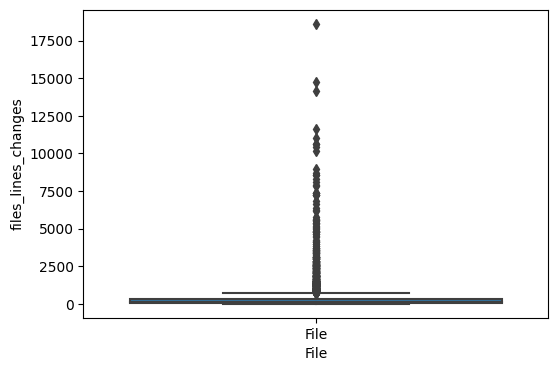

In [21]:
df_kafka_amloc_java['File'] = 'File'
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='files_lines_changes', data=df_kafka_amloc_java) #showfliers=False

<Axes: xlabel='File', ylabel='files_lines_changes'>

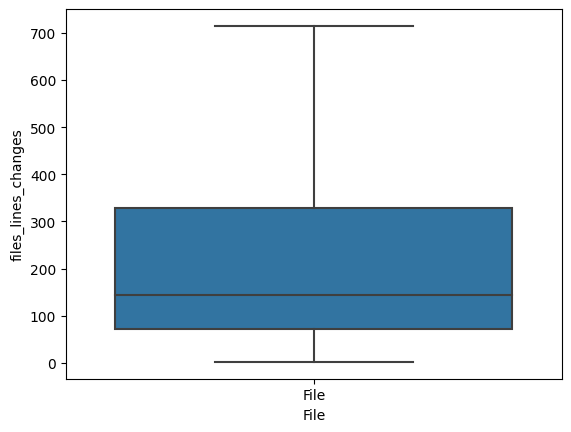

In [22]:
sns.boxplot(x='File', y='files_lines_changes', data=df_kafka_amloc_java, showfliers=False)

In [23]:
# Mostra os quatis
em_q1_amloc = np.percentile(df_kafka_amloc_java.files_lines_changes, [25])
em_q2_amloc = np.percentile(df_kafka_amloc_java.files_lines_changes, [50])
em_q3_amloc = np.percentile(df_kafka_amloc_java.files_lines_changes, [75])
em_q4_amloc = np.percentile(df_kafka_amloc_java.files_lines_changes, [100])
print(f'q1: {em_q1_amloc}, q2: {em_q2_amloc}, q3: {em_q3_amloc}, q4: {em_q4_amloc}')

q1: [72.], q2: [143.], q3: [329.5], q4: [18622.]


### Kafka FOC

In [24]:
df_kafka_foc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/kafka-treemap/main/results/kafka_files_frequency.csv')
df_kafka_foc

,Unnamed: 0,file,frequency_in_commits
0,0,CONTRIBUTORS,2
1,1,LICENSE,46
2,2,NOTICE,24
3,3,README.md,198
4,4,kafka-console-consumer-log4j.properties,5
...,...,...,...
6152,6152,BrokerBlockingSender.scala,1
6153,6153,LeaderEndPoint.scala,1
6154,6154,LocalLeaderEndPoint.scala,1
6155,6155,RemoteLeaderEndPoint.scala,1


In [25]:
s_pesquisa_foc_java = df_kafka_foc.file.str.contains('.java')
df_kafka_foc_java = df_kafka_foc[s_pesquisa_foc_java]
df_kafka_foc_java

,Unnamed: 0,file,frequency_in_commits
150,150,KafkaETLContext.java,17
151,151,KafkaETLInputFormat.java,5
152,152,KafkaETLJob.java,5
153,153,KafkaETLKey.java,5
154,154,KafkaETLRecordReader.java,4
...,...,...,...
6143,6143,QuorumFeaturesTest.java,2
6144,6144,FeatureLevelListener.java,1
6145,6145,AclsDeltaTest.java,1
6150,6150,BrokerRegistrationFencingChange.java,1


<ipython-input-26-0d8c1d067ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kafka_foc_java['File'] = 'File'


<Axes: xlabel='File', ylabel='frequency_in_commits'>

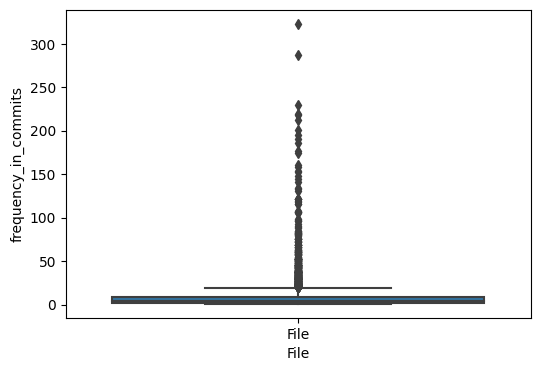

In [26]:
df_kafka_foc_java['File'] = 'File'
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='frequency_in_commits', data=df_kafka_foc_java) #showfliers=False

<Axes: xlabel='File', ylabel='frequency_in_commits'>

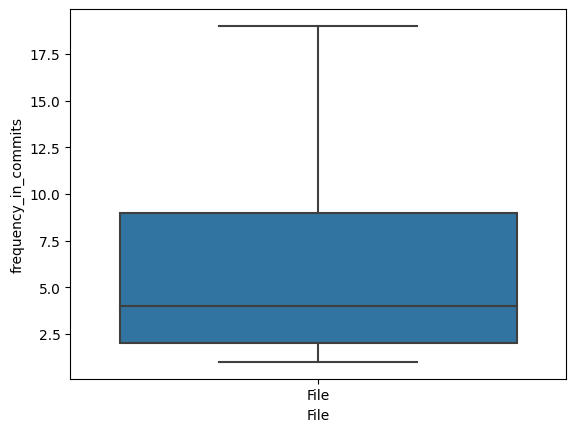

In [27]:
sns.boxplot(x='File', y='frequency_in_commits', data=df_kafka_foc_java, showfliers=False)

In [28]:
# Mostra os quatis
em_q1_foc = np.percentile(df_kafka_foc_java.frequency_in_commits, [25])
em_q2_foc = np.percentile(df_kafka_foc_java.frequency_in_commits, [50])
em_q3_foc = np.percentile(df_kafka_foc_java.frequency_in_commits, [75])
em_q4_foc = np.percentile(df_kafka_foc_java.frequency_in_commits, [100])
print(f'q1: {em_q1_foc}, q2: {em_q2_foc}, q3: {em_q3_foc}, q4: {em_q4_foc}')

q1: [2.], q2: [4.], q3: [9.], q4: [323.]


### Kafka CC

In [29]:
df_kafka_cc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/kafka-treemap/main/results/kafka_files_cc.csv')
df_kafka_cc

,Unnamed: 0,file,files_cc
0,0,CONTRIBUTORS,0
1,1,LICENSE,0
2,2,NOTICE,0
3,3,README.md,0
4,4,kafka-console-consumer-log4j.properties,0
...,...,...,...
6152,6152,BrokerBlockingSender.scala,7
6153,6153,LeaderEndPoint.scala,0
6154,6154,LocalLeaderEndPoint.scala,35
6155,6155,RemoteLeaderEndPoint.scala,36


In [30]:
s_pesquisa_cc_java = df_kafka_cc.file.str.contains('.java')
df_kafka_cc_java = df_kafka_cc[s_pesquisa_cc_java]
df_kafka_cc_java

,Unnamed: 0,file,files_cc
150,150,KafkaETLContext.java,0
151,151,KafkaETLInputFormat.java,0
152,152,KafkaETLJob.java,0
153,153,KafkaETLKey.java,0
154,154,KafkaETLRecordReader.java,0
...,...,...,...
6143,6143,QuorumFeaturesTest.java,4
6144,6144,FeatureLevelListener.java,0
6145,6145,AclsDeltaTest.java,7
6150,6150,BrokerRegistrationFencingChange.java,4


<ipython-input-31-44705d0d008d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kafka_cc_java['File'] = 'File'


<Axes: xlabel='File', ylabel='files_cc'>

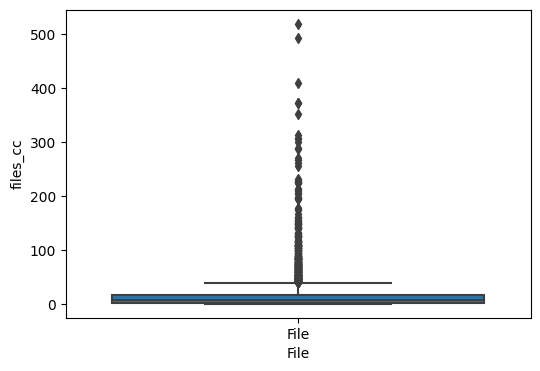

In [31]:
df_kafka_cc_java['File'] = 'File'
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='files_cc', data=df_kafka_cc_java) #showfliers=False

<Axes: xlabel='File', ylabel='files_cc'>

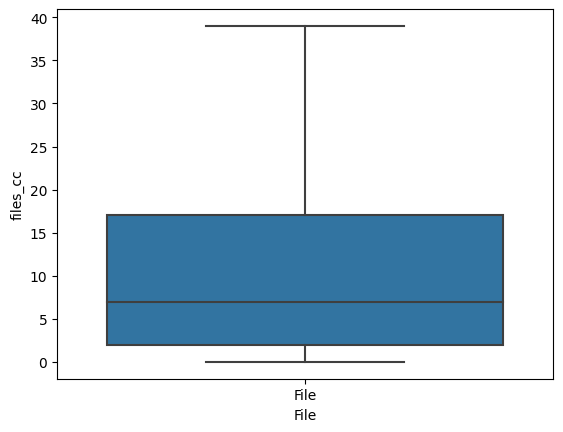

In [32]:
sns.boxplot(x='File', y='files_cc', data=df_kafka_cc_java,showfliers=False)

In [33]:
# Mostra os quatis
em_q1_cc = np.percentile(df_kafka_cc_java.files_cc, [25])
em_q2_cc = np.percentile(df_kafka_cc_java.files_cc, [50])
em_q3_cc = np.percentile(df_kafka_cc_java.files_cc, [75])
em_q4_cc = np.percentile(df_kafka_cc_java.files_cc, [100])
print(f'q1: {em_q1_cc}, q2: {em_q2_cc}, q3: {em_q3_cc}, q4: {em_q4_cc}')

q1: [2.], q2: [7.], q3: [17.], q4: [519.]


### Files frequetly changed over time: AMLOC_FOC

In [34]:
df_kafka_classes_amloc_foc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/kafka-treemap/main/results/kafka_arquivos_criticos.csv')
df_kafka_classes_amloc_foc

,Unnamed: 0,File,Frequency,lines_modified
0,0,KafkaETLContext.java,17,730
1,9,DataGenerator.java,11,376
2,13,KafkaOutputFormat.java,14,643
3,16,ConsumerConnector.java,17,489
4,19,Consumer.java,51,973
...,...,...,...,...
749,3524,TopologyMetadata.java,21,984
750,3560,NamedTopologyIntegrationTest.java,21,1863
751,3602,MetadataDelta.java,9,471
752,3774,StoreQueryUtils.java,9,470


In [35]:
df_kafka_classes_amloc_foc['compose'] = df_kafka_classes_amloc_foc['Frequency']*df_kafka_classes_amloc_foc['lines_modified']
df_kafka_classes_amloc_foc = df_kafka_classes_amloc_foc.sort_values(by='compose', ascending=False).head(20)
df_kafka_classes_amloc_foc

,Unnamed: 0,File,Frequency,lines_modified,compose
164,452,StreamThread.java,323,14137,4566251
182,480,StreamThreadTest.java,219,14724,3224556
65,168,KafkaConsumer.java,287,10142,2910754
87,200,RequestResponseTest.java,229,10422,2386638
148,403,KStream.java,121,18622,2253262
103,235,FetcherTest.java,186,11049,2055114
476,1372,KafkaAdminClient.java,191,10647,2033577
181,479,StreamTaskTest.java,174,11612,2020488
478,1381,KafkaAdminClientTest.java,153,10607,1622871
163,451,StreamTask.java,212,7250,1537000


### Architectural Smells: Cycle Dependency and Hub-like Dependency

In [36]:
df_kafka_as_ds = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/designite/analise_designite_3_0_1_kafka.csv')
df_kafka_as_ds.columns = ['ProjectName', 'PackageName', 'TypeName', 'CodeSmell']
df_kafka_as_ds

,ProjectName,PackageName,TypeName,CodeSmell
0,kafka,kafka.metrics,KafkaYammerMetrics,Deficient Encapsulation
1,kafka,kafka.testkit,Builder,Unutilized Abstraction
2,kafka,kafka.testkit,Builder,Unutilized Abstraction
3,kafka,kafka.testkit,Builder,Unutilized Abstraction
4,kafka,kafka.testkit,TestKitNodes,Unexploited Encapsulation
...,...,...,...,...
3302,kafka,org.apache.kafka.trogdor.task,SampleTaskController,Unutilized Abstraction
3303,kafka,org.apache.kafka.trogdor.task,TaskSpecTest,Unutilized Abstraction
3304,kafka,org.apache.kafka.trogdor.task,SampleTaskWorker,Unutilized Abstraction
3305,kafka,org.apache.kafka.trogdor.rest,RestExceptionMapperTest,Unutilized Abstraction


In [37]:
df_kafka_as_ds.CodeSmell.unique()

array(['Deficient Encapsulation', 'Unutilized Abstraction',
       'Unexploited Encapsulation', 'Missing Hierarchy',
       'Insufficient Modularization', 'Unnecessary Abstraction',
       'Cyclic-Dependent Modularization', 'Broken Hierarchy',
       'Wide Hierarchy', 'Imperative Abstraction',
       'Hub-like Modularization', 'Multifaceted Abstraction',
       'Rebellious Hierarchy', 'Broken Modularization',
       'Multipath Hierarchy', 'Cyclic Hierarchy', 'Deep Hierarchy'],
      dtype=object)

In [38]:
df_kafka_as_ds.query('CodeSmell=="Cyclic-Dependent Modularization" or CodeSmell=="Hub-like Modularization"')

,ProjectName,PackageName,TypeName,CodeSmell
25,kafka,org.apache.kafka.clients,InFlightRequests,Cyclic-Dependent Modularization
29,kafka,org.apache.kafka.clients,NetworkClient,Cyclic-Dependent Modularization
45,kafka,org.apache.kafka.clients,RequestCompletionHandler,Cyclic-Dependent Modularization
46,kafka,org.apache.kafka.clients,ClientResponse,Cyclic-Dependent Modularization
89,kafka,org.apache.kafka.clients.admin,KafkaAdminClient,Cyclic-Dependent Modularization
...,...,...,...,...
3200,kafka,org.apache.kafka.trogdor.coordinator,TaskManager,Cyclic-Dependent Modularization
3217,kafka,org.apache.kafka.trogdor.common,Node,Cyclic-Dependent Modularization
3218,kafka,org.apache.kafka.trogdor.common,Util,Cyclic-Dependent Modularization
3266,kafka,org.apache.kafka.trogdor.agent,AgentRestResource,Cyclic-Dependent Modularization


In [39]:
list_kafka_classes_as_ds = df_kafka_as_ds.TypeName.unique().tolist()
list_kafka_classes_as_ds

['KafkaYammerMetrics',
 'Builder',
 'TestKitNodes',
 'ClusterTestExtensionsTest',
 'MockController',
 'ClusterConfig',
 'ClusterGenerator',
 'GenericParameterResolver',
 'RaftClusterInvocationContext',
 'RaftClusterInstance',
 'ZkClusterInvocationContext',
 'ZkClusterInstance',
 'ClusterTestExtensions',
 'EmptyClass',
 'ClusterInstanceParameterResolver',
 'InFlightRequests',
 'CommonClientConfigs',
 'ClusterConnectionStates',
 'NetworkClient',
 'DefaultMetadataUpdater',
 'InProgressData',
 'StaleMetadataException',
 'DefaultHostResolver',
 'FetchRequestData',
 'GroupRebalanceConfig',
 'Metadata',
 'MetadataRequestAndVersion',
 'LeaderAndEpoch',
 'ManualMetadataUpdater',
 'RequestCompletionHandler',
 'ClientResponse',
 'DescribeConsumerGroupsOptions',
 'RemoveMembersFromConsumerGroupOptions',
 'ListTransactionsResult',
 'ListPartitionReassignmentsResult',
 'DescribeFeaturesOptions',
 'CreateDelegationTokenResult',
 'DescribeLogDirsResult',
 'AlterUserScramCredentialsResult',
 'DescribeA

### Critical Classes

In [40]:
list_kafka_classes_amloc_foc = df_kafka_classes_amloc_foc.File.unique().tolist()
list_kafka_classes_amloc_foc

['StreamThread.java',
 'StreamThreadTest.java',
 'KafkaConsumer.java',
 'RequestResponseTest.java',
 'KStream.java',
 'FetcherTest.java',
 'KafkaAdminClient.java',
 'StreamTaskTest.java',
 'KafkaAdminClientTest.java',
 'StreamTask.java',
 'Fetcher.java',
 'KafkaStreams.java',
 'TaskManager.java',
 'ConsumerCoordinatorTest.java',
 'KStreamImpl.java',
 'KafkaConsumerTest.java',
 'KafkaProducer.java',
 'SenderTest.java',
 'StreamsConfig.java',
 'ConsumerCoordinator.java']

In [41]:
list_kafka_critical_classes = []
for each in list_kafka_classes_amloc_foc:
  each = each.replace('.java','')
  if each in list_kafka_classes_as_ds:
    list_kafka_critical_classes.append(each)

print(f'{len(list_kafka_critical_classes)}: {list_kafka_critical_classes}')

18: ['StreamThread', 'KafkaConsumer', 'RequestResponseTest', 'KStream', 'FetcherTest', 'KafkaAdminClient', 'KafkaAdminClientTest', 'StreamTask', 'Fetcher', 'KafkaStreams', 'TaskManager', 'ConsumerCoordinatorTest', 'KStreamImpl', 'KafkaConsumerTest', 'KafkaProducer', 'SenderTest', 'StreamsConfig', 'ConsumerCoordinator']


# 5. Critical Files - Tsoukalas2023

Comparações

c1)
Os arquivos críticos Kafka ncontrados pelo ADTCodeAnalyzer aparecem nos arquivos que possem AS do trabalho de TKS2023?


In [ ]:
def pesquisa_por_nome(my_df, nome):
  resultado = my_df['affectedElements'].str.contains(nome)
  return resultado

def aparece_sas_2022(my_df, nome):
  resultado = my_df['affectedElements'].str.contains(nome)
  contagem = my_df[resultado]
  if len(contagem) > 0:
    return True
  else:
    return False

## 5.1 Classes do Kafka de alta prioridade para pagar TD

In [42]:
list_classes_kafka_high_priority_tks_2023 = df_kafka_tks2023_by_priority['Class Name'].head(18).to_list()
list_classes_kafka_high_priority_tks_2023

['StreamThread.java',
 'Fetcher.java',
 'StreamTask.java',
 'KafkaConsumer.java',
 'StreamsConfig.java',
 'ConsumerCoordinator.java',
 'KafkaProducer.java',
 'KafkaStreams.java',
 'RocksDBStore.java',
 'KTableImpl.java',
 'AbstractCoordinator.java',
 'KStreamImpl.java',
 'ProcessorStateManager.java',
 'NetworkClient.java',
 'Sender.java',
 'Utils.java',
 'ConsumerNetworkClient.java',
 'RecordAccumulator.java']

In [46]:
lista_arquivos_criticos_kafka_tks_2023 = []
for each in list_kafka_critical_classes:
  each = each + '.java'
  if each in list_classes_kafka_high_priority_tks_2023:
    lista_arquivos_criticos_kafka_tks_2023.append(each)
    print(each)

StreamThread.java
KafkaConsumer.java
StreamTask.java
Fetcher.java
KafkaStreams.java
KStreamImpl.java
KafkaProducer.java
StreamsConfig.java
ConsumerCoordinator.java


In [47]:
qtd_classes_criticas_my_method = len(list_kafka_critical_classes)
qtd_classes_criticas_tks_2023 = len(lista_arquivos_criticos_kafka_tks_2023)
print(f'Das {qtd_classes_criticas_my_method} classes críticas identificadas por ATDCodeAnalizer, {qtd_classes_criticas_tks_2023} aparecem no TKS2023 ')
print(f'Taxa de acerto para o Kafka: {round(qtd_classes_criticas_tks_2023/qtd_classes_criticas_my_method, 2)}')

Das 18 classes críticas identificadas por ATDCodeAnalizer, 9 aparecem no TKS2023 
Taxa de acerto para o Kafka: 0.5
